In [ ]:
!pip install numpy matplotlib seaborn tensorflow scikit-learn

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2024-11-05 21:33:13.981954: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-05 21:33:14.152491: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-05 21:33:14.215510: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-05 21:33:14.240382: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-05 21:33:14.402440: I tensorflow/core/platform/cpu_feature_guar

Found 4717 images belonging to 2 classes.
Found 794 images belonging to 2 classes.


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.7244 - loss: 0.5277 - val_accuracy: 0.7620 - val_loss: 0.5808
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.8388 - loss: 0.3869 - val_accuracy: 0.7607 - val_loss: 0.5479
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - accuracy: 0.8353 - loss: 0.3844 - val_accuracy: 0.7607 - val_loss: 0.5451
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - accuracy: 0.8419 - loss: 0.3611 - val_accuracy: 0.7607 - val_loss: 0.5867
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.8451 - loss: 0.3358 - val_accuracy: 0.7544 - val_loss: 0.4726
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.8445 - loss: 0.3081 - val_accuracy: 0.7620 - val_loss: 0.4689
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - accuracy: 0.8477 - loss: 0.3039 - val_accuracy: 0.7733 - val_loss: 0.4598
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - accuracy: 0.8644 - loss: 0.2851 - val_acc

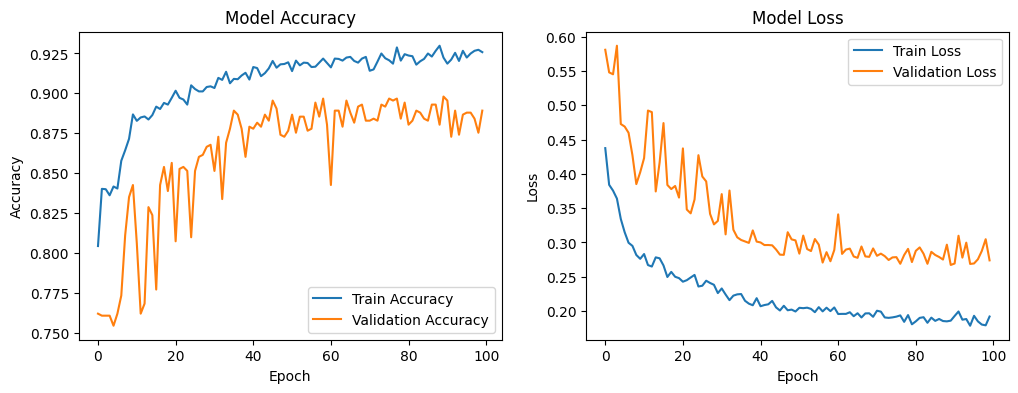

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Classification Report
              precision    recall  f1-score   support

      galaxy       0.27      0.20      0.23       189
        star       0.77      0.83      0.80       605

    accuracy                           0.68       794
   macro avg       0.52      0.51      0.51       794
weighted avg       0.65      0.68      0.66       794

Confusion Matrix


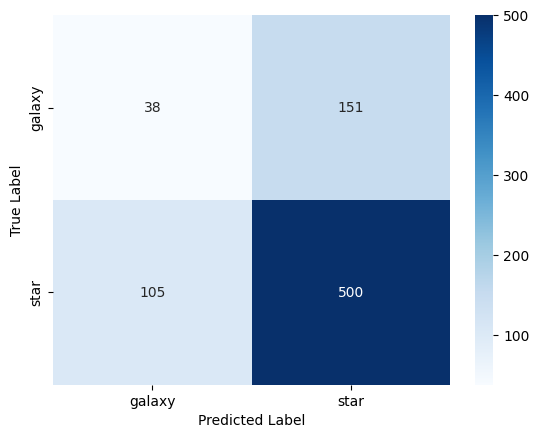

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Set up directories
train_dir = 'dataset2/train'
test_dir = 'dataset2/test'

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.15,
                                   horizontal_flip=True,
                                   fill_mode="nearest")

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the images from directories
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(64, 64),
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    color_mode='rgb')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(64, 64),
                                                  batch_size=64,
                                                  class_mode='categorical',
                                                  color_mode='rgb')

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=100,
                    validation_data=test_generator)

# Save the model
model.save('star_galaxy_classifier.keras')

# Evaluate the model
score = model.evaluate(test_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict on the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Generate classification report and confusion matrix
print('Classification Report')
target_names = list(train_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted Class: star
Prediction Probabilities: [[0.11210492 0.88789505]]


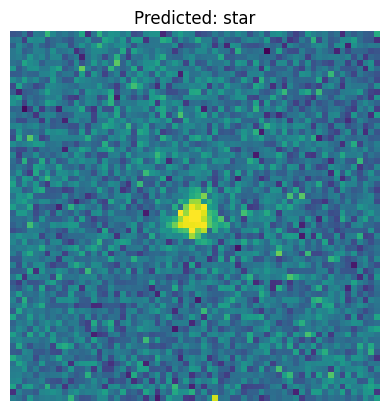

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model('star_galaxy_classifier.h5')  # replace with your model's path

def load_and_preprocess_image(img_path):
    """Load and preprocess the image for prediction."""
    img = image.load_img(img_path, target_size=(64, 64), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch of size 1
    img_array /= 255.0  # Rescale the image
    return img_array

def predict_image(img_path):
    """Predict the class of the input image."""
    preprocessed_image = load_and_preprocess_image(img_path)
    predictions = model.predict(preprocessed_image)
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class, predictions

# Example of using the prediction function
img_path = 'dataset1/test/star/grb0422a_01_1465_1314_6.jpg'  # replace with the image path you want to predict
predicted_class, predictions = predict_image(img_path)

# Display the prediction results
class_labels = list(train_generator.class_indices.keys())
print(f"Predicted Class: {class_labels[predicted_class[0]]}")
print(f"Prediction Probabilities: {predictions}")

# Optional: Display the input image
plt.imshow(image.load_img(img_path, color_mode='grayscale'))
plt.title(f"Predicted: {class_labels[predicted_class[0]]}")
plt.axis('off')
plt.show()
